In [4]:
import pandas as pd

In [5]:
import sklearn
import numpy as np
from sklearn.feature_extraction import DictVectorizer


In [6]:
df_jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [7]:
df_feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [8]:
#Q1 - answer = 19
df_jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


In [9]:
#Q2 - answer = 42,59

## Calculer la durée d'un course
df_jan["duration"] = (df_jan["tpep_dropoff_datetime"]-df_jan["tpep_pickup_datetime"]).dt.total_seconds() / 60

##Caculer l'écart type de la durée d'une course
std_duration_minutes = df_jan['duration'].std()

print(f"Écart-type de la durée en minutes : {std_duration_minutes}")

Écart-type de la durée en minutes : 42.594351241920904


In [10]:
#Q3 - answer = 98%

# Filtrer
df_jan_filtered = df_jan[(df_jan['duration'] >= 1) & (df_jan['duration'] <= 60)]

# Fraction restante
fraction_left = len(df_jan_filtered) / len(df_jan)
print(f"Fraction restante : {fraction_left:.4f}")


Fraction restante : 0.9812


In [11]:
#Q4 - answer =2

categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

df_jan_filtered[categorical] =df_jan_filtered[categorical].astype(str)

train_dicts = df_jan_filtered[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

X_train.shape

/tmp/ipykernel_37673/534670339.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jan_filtered[categorical] =df_jan_filtered[categorical].astype(str)


(3009173, 516)

In [12]:
target = 'duration'

y_train = df_jan_filtered[target].values

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(X_train)

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


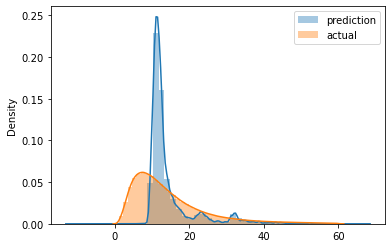

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(y_pred, label ='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
#Q5 - answer = 7,64
mean_squared_error(y_train, y_pred, squared = False)

7.649127185256247

In [19]:
#Q6 - answer = 7,81

df_feb["duration"] = (df_feb["tpep_dropoff_datetime"]-df_feb["tpep_pickup_datetime"]).dt.total_seconds() / 60

df_feb_filtered = df_feb[(df_feb['duration'] >= 1) & (df_feb['duration'] <= 60)]

df_feb_filtered[categorical] = df_feb_filtered[categorical].astype(str)
val_dicts = df_feb_filtered[categorical + numerical].to_dict(orient='records')

X_val = dv.transform(val_dicts)  # on utilise transform, pas fit_transform
y_val = df_feb_filtered['duration'].values

y_pred_val = lr.predict(X_val)
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f"RMSE on validation (Feb 2023): {rmse_val:.2f}")

/tmp/ipykernel_37673/2729811509.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feb_filtered[categorical] = df_feb_filtered[categorical].astype(str)


RMSE on validation (Feb 2023): 7.81


In [20]:
print(f"RMSE on validation (Feb 2023): {rmse_val:.2f}")

RMSE on validation (Feb 2023): 7.81
